In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
! pip install nltk
! pip install pandas
! pip install numpy
! pip install regex
! pip install matplotlib
! pip install collection
! pip install textblob
! pip install scikit-learn
! pip install seaborn
! pip install bokeh
! pip install ipywidgets
! pip install squarify

#Ulta Dermalogica Skincare Reviews

In [ ]:
import pandas as pd
import numpy as np
import operator
import re
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import collections
from collections import OrderedDict
from collections import Counter

from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Ulta Skincare Reviews.csv')  #use your respective path here
df.head(3)

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower...,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm o...,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
2,Clean skin,Enjoy this product so much ! I look forward to...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


In [ ]:
df.isna().sum()

Review_Title        0
Review_Text         2
Verified_Buyer      0
Review_Date         0
Review_Location     1
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

In [ ]:
missing_values_count = df.isna().sum()

missing_values_df = pd.DataFrame(missing_values_count, columns=['Missing Values'])

display(missing_values_df)

,Missing Values
Review_Title,0
Review_Text,2
Verified_Buyer,0
Review_Date,0
Review_Location,1
Review_Upvotes,0
Review_Downvotes,0
Product,0
Brand,0
Scrape_Date,0


In [ ]:
df.fillna('Unknown', inplace=True)

#Text Cleaning

Here we will clean the review text. This includes making all reviews lowercase, removing stop words from the reviews, and removing certain punctuation.

In [ ]:
stop = stopwords.words('english')
df['Review_Text_Lower'] = df['Review_Text'].apply(lambda x: x.lower())
df['Review_Text_NoSw'] = df['Review_Text_Lower'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['Clean_Text'] = df['Review_Text_NoSw'].apply(lambda x: re.sub('[^\w\s]', "", x))

#Text Tokenization

Here we will tokenize our review text. This allows us to apply certain functions to the text, such as functions to extract common word collocations, or words that frequently appear together.

In [ ]:
df["Tokenized_Text"] = df["Clean_Text"].apply(nltk.word_tokenize)
df['NLTK_Text'] = df['Tokenized_Text'].apply(nltk.Text)

#Text Frequency

### Most Common Words

In this section we will begin extracting common words and phrases. We will start by extracting the most common words. While this section is interesting, it does not provide us with much insight about the nature of reviews.

In [ ]:
Counter(" ".join(df['Clean_Text']).split()).most_common(25)

[('skin', 5429),
 ('product', 2618),
 ('use', 1848),
 ('face', 1344),
 ('love', 1294),
 ('using', 1260),
 ('smooth', 980),
 ('great', 934),
 ('soft', 868),
 ('like', 842),
 ('used', 789),
 ('feel', 774),
 ('it', 764),
 ('really', 684),
 ('feeling', 663),
 ('clean', 638),
 ('leaves', 634),
 ('dermalogica', 632),
 ('one', 630),
 ('daily', 629),
 ('ive', 628),
 ('gentle', 611),
 ('feels', 609),
 ('dry', 607),
 ('time', 538)]

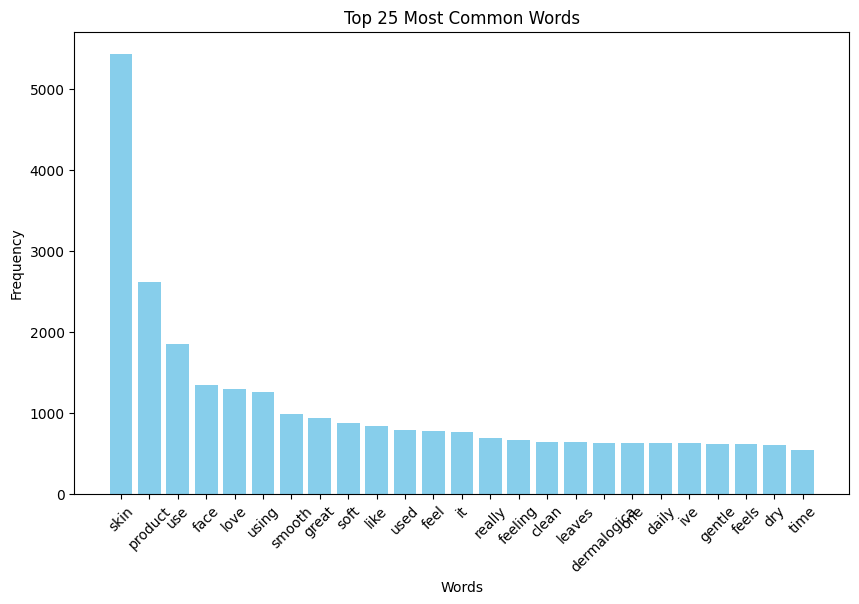

In [ ]:
common_words = Counter(" ".join(df['Clean_Text']).split()).most_common(25)

words, frequencies = zip(*common_words)

plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 25 Most Common Words')
plt.xticks(rotation=45)
plt.show()

### Word Cloud

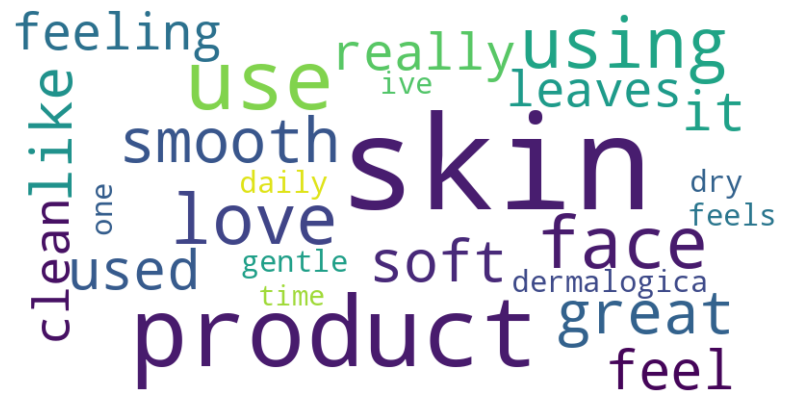

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Assuming you have already calculated the word frequencies
common_words = Counter(" ".join(df['Clean_Text']).split()).most_common(25)

# Create a dictionary for the word cloud
wordcloud_dict = dict(common_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_dict)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#Bigram Collection

Here we will generate the most common bigrams detected in reviews for the Multi-Vitamin Thermafoliant product.

In [ ]:
mvt = df.query('Product == "Multi-Vitamin Thermafoliant"')

In [ ]:
bigrams = collections.Counter()
for phrase in mvt["NLTK_Text"]:
    try:
        bigrams.update(nltk.bigrams(phrase))
    except StopIteration:
        # Handle the end of the iterator
        print("End of iterator")

bigrams_sorted = sorted(bigrams.items(),key=operator.itemgetter(1),reverse=True)
bigrams_sorted[0:15]

[(('leaves', 'skin'), 29),
 (('makes', 'skin'), 29),
 (('skin', 'feels'), 28),
 (('times', 'week'), 28),
 (('love', 'product'), 24),
 (('love', 'it'), 17),
 (('warming', 'sensation'), 17),
 (('skin', 'feel'), 17),
 (('soft', 'smooth'), 16),
 (('use', 'product'), 15),
 (('dry', 'skin'), 15),
 (('skin', 'soft'), 14),
 (('skin', 'feeling'), 13),
 (('ive', 'used'), 13),
 (('twice', 'week'), 11)]

## Bigram Collection Continued

We are interested in knowing the feelings associated with the Multi-Vitamin Thermafoliant product and how it leaves the reviewers' skin. To do so, we will subset our bigrams to only collect those starting with 'feeling' or 'leaves'.

In [ ]:
feeling_reviews = []

for bigram in bigrams_sorted:
    if 'feeling' in bigram[0][0]:
        feeling_reviews.append(bigram)

feeling_reviews[0:15]

[(('feeling', 'soft'), 6),
 (('feeling', 'smooth'), 4),
 (('feeling', 'silky'), 2),
 (('feeling', 'like'), 2),
 (('feeling', 'clean'), 2),
 (('feeling', 'skin'), 2),
 (('feeling', 'scrub'), 2),
 (('feeling', 'warmth'), 1),
 (('feeling', 'get'), 1),
 (('feeling', 'pretty'), 1),
 (('feeling', 'amazingly'), 1),
 (('feeling', 'smell'), 1),
 (('feeling', 'normal'), 1),
 (('feeling', 'cleaner'), 1),
 (('feeling', 'wonderful'), 1)]

In [ ]:
feeling_bigram = []
feeling_freq = []

for review in feeling_reviews:
    if review[1] >= 2:
        feeling_freq.append(review[1])
        feeling_bigram.append(' '.join(review[0]))

df_feeling_bg = pd.DataFrame({'Bigram':feeling_bigram, 'Frequency':feeling_freq})


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'feeling soft'),
  Text(1, 0, 'feeling smooth'),
  Text(2, 0, 'feeling silky'),
  Text(3, 0, 'feeling like'),
  Text(4, 0, 'feeling clean'),
  Text(5, 0, 'feeling skin'),
  Text(6, 0, 'feeling scrub')])

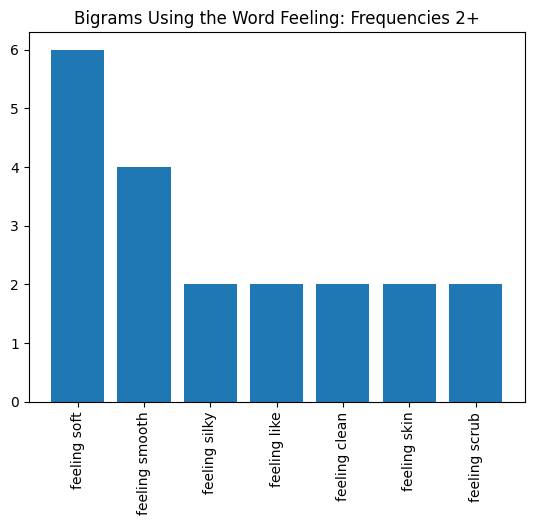

In [ ]:
plt.bar(df_feeling_bg['Bigram'], height=df_feeling_bg['Frequency'])
plt.title('Bigrams Using the Word Feeling: Frequencies 2+')
plt.xticks(rotation=90)

## Bigram Graph Summaries

From the 'feeling' and 'leaves' bar plots, we can see that most reviewers reported the product leaving their skin **feeling soft**, **smooth**, **silky**, and **clean**. Therefore, from this data we can determine that the product is effective in doing the following functions.

#Trigram Collection

In order to obtain more specific information from the reviews, we will generate trigrams from reviews on the product issued a year ago.

In [ ]:
mvt_1year = mvt.query('Review_Date == "1 year ago"')

In [ ]:
trigrams = collections.Counter()
for phrase in mvt_1year['NLTK_Text']:
    trigrams.update(nltk.trigrams(phrase))

trigrams_sorted = sorted(trigrams.items(),key=operator.itemgetter(1),reverse=True)
trigrams_sorted[0:15]

[(('skin', 'feeling', 'soft'), 2),
 (('dead', 'skin', 'cells'), 2),
 (('skin', 'feels', 'smooth'), 2),
 (('makes', 'skin', 'feel'), 2),
 (('scrub', 'helped', 'lot'), 1),
 (('helped', 'lot', 'clean'), 1),
 (('lot', 'clean', 'skin'), 1),
 (('clean', 'skin', 'excess'), 1),
 (('skin', 'excess', 'sebum'), 1),
 (('best', 'face', 'scrub'), 1),
 (('face', 'scrub', 'sensitive'), 1),
 (('scrub', 'sensitive', 'skin'), 1),
 (('id', 'like', 'cancel'), 1),
 (('like', 'cancel', 'recurring'), 1),
 (('cancel', 'recurring', 'shipment'), 1)]

In [ ]:
feel_reviews_tr = []

for trigram in trigrams_sorted:
    if 'feel' in trigram[0][0]:
        feel_reviews_tr.append(trigram)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'feel warmth product'),
  Text(1, 0, 'feels really good'),
  Text(2, 0, 'feel though see'),
  Text(3, 0, 'feels amazing smells'),
  Text(4, 0, 'feel warming sensation'),
  Text(5, 0, 'feeling soft smell'),
  Text(6, 0, 'feels smooth using'),
  Text(7, 0, 'feeling like silk'),
  Text(8, 0, 'feels soft great'),
  Text(9, 0, 'feels strong peeling'),
  Text(10, 0, 'feels toasty scrubby'),
  Text(11, 0, 'feeling warmth leaves'),
  Text(12, 0, 'feels amazing looks'),
  Text(13, 0, 'feels leaving facial'),
  Text(14, 0, 'feeling soft fresh')])

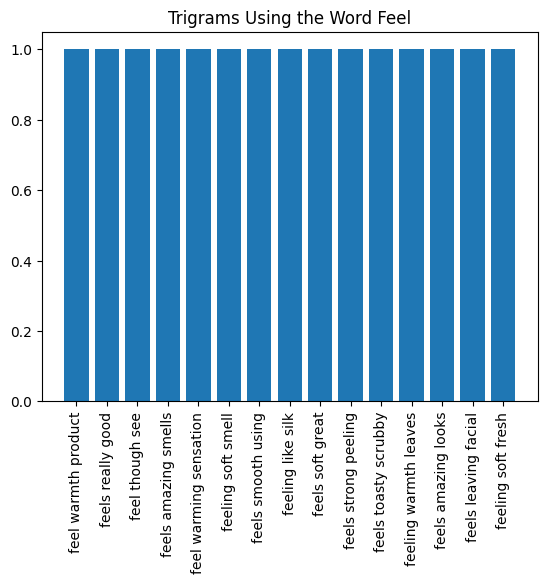

In [ ]:
feel_trigram = []
feel_freq_tr = []

for review in feel_reviews_tr[0:15]:
    feel_freq_tr.append(review[1])
    feel_trigram.append(' '.join(review[0]))

df_feel_tr = pd.DataFrame({'Trigram':feel_trigram, 'Frequency':feel_freq_tr})

plt.bar(df_feel_tr['Trigram'], height=df_feel_tr['Frequency'])
plt.title('Trigrams Using the Word Feel')
plt.xticks(rotation=90)

## Trigram Graph Summary

Similar to the bigram bar plots, the trigram bar plot revealed that trigrams in the reviews from a year ago specified the product leaving skin feeling soft, clean and like silk. It also left a feeling of warmth.

#Preprocessing

In [ ]:
df['Review_Text'] = df['Review_Text'].astype(str)
df['Review_Text'] = df['Review_Text'].apply(lambda x: x.lower())
df['Review_Text'] = df['Review_Text'].apply(lambda x: re.sub('[^a-zA-Z0-9]',' ',x))
df['Review_Text'] = df['Review_Text'].apply(lambda x: word_tokenize(x))
df['Review_Text']

0       [love, using, this, on, my, face, while, in, t...
1       [even, better, than, the, daily, microfoliant,...
2       [enjoy, this, product, so, much, i, look, forw...
3       [i, ve, never, tried, anything, like, this, be...
4       [this, exfoliates, very, nicely, and, gives, a...
                              ...                        
4145              [much, better, product, than, a, scrub]
4146    [i, ve, been, using, this, exfoliant, for, a, ...
4147    [my, skin, looks, better, now, than, 10, years...
4148    [this, product, was, useless, for, me, i, shou...
4149    [this, product, is, amazing, it, is, the, only...
Name: Review_Text, Length: 4150, dtype: object

In [ ]:
df['Review_Text'] = df['Review_Text'].apply(lambda x: [word for word in x if word not in stopwords.words('english')])
df['Review_Text']

0       [love, using, face, shower, heats, gives, ligh...
1       [even, better, daily, microfoliant, obsessed, ...
2       [enjoy, product, much, look, forward, using, r...
3       [never, tried, anything, like, love, apply, fa...
4       [exfoliates, nicely, gives, smooth, skin, irri...
                              ...                        
4145                       [much, better, product, scrub]
4146    [using, exfoliant, months, depending, conditio...
4147                [skin, looks, better, 10, years, ago]
4148    [product, useless, known, exfoliant, use, dail...
4149    [product, amazing, thing, helps, dry, patches,...
Name: Review_Text, Length: 4150, dtype: object

In [ ]:
ps=PorterStemmer()
df['Review_Text'] = df['Review_Text'].apply(lambda x: [ps.stem(y) for y in x])
df['Review_Text'] = df['Review_Text'].apply(lambda x: ' '.join(x))
df['Review_Text']

0         love use face shower heat give light scrub nice
1       even better daili microfoli obsess skin much s...
2       enjoy product much look forward use realli fee...
3       never tri anyth like love appli face get littl...
4       exfoli nice give smooth skin irrit reaction sk...
                              ...                        
4145                            much better product scrub
4146    use exfoli month depend condit skin use anywhe...
4147                         skin look better 10 year ago
4148    product useless known exfoli use daili would g...
4149    product amaz thing help dri patch cheek also c...
Name: Review_Text, Length: 4150, dtype: object

In [ ]:
!pip install vaderSentiment

import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
df['score']=df['Review_Text'].apply(lambda x: sia.polarity_scores(x)['compound'])
df

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,Review_Text_Lower,Review_Text_NoSw,Clean_Text,Tokenized_Text,NLTK_Text,score
0,Perfect,love use face shower heat give light scrub nice,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,love using this on my face while in the shower...,love using face shower. heats gives light scru...,love using face shower heats gives light scrub...,"[love, using, face, shower, heats, gives, ligh...","(love, using, face, shower, heats, gives, ligh...",0.7906
1,You need this,even better daili microfoli obsess skin much s...,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,even better than the daily microfoliant. i'm o...,even better daily microfoliant. i'm obsessed. ...,even better daily microfoliant im obsessed ski...,"[even, better, daily, microfoliant, im, obsess...","(even, better, daily, microfoliant, im, obsess...",0.2263
2,Clean skin,enjoy product much look forward use realli fee...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,enjoy this product so much ! i look forward to...,enjoy product much ! look forward using - real...,enjoy product much look forward using really...,"[enjoy, product, much, look, forward, using, r...","(enjoy, product, much, look, forward, using, r...",0.8074
3,Love This Stuff!,never tri anyth like love appli face get littl...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,i've never tried anything like this before and...,i've never tried anything like love it. apply ...,ive never tried anything like love it apply fa...,"[ive, never, tried, anything, like, love, it, ...","(ive, never, tried, anything, like, love, it, ...",0.7839
4,This exfoliates very nicely and,exfoli nice give smooth skin irrit reaction sk...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,this exfoliates very nicely and gives a very s...,exfoliates nicely gives smooth skin irritation...,exfoliates nicely gives smooth skin irritation...,"[exfoliates, nicely, gives, smooth, skin, irri...","(exfoliates, nicely, gives, smooth, skin, irri...",0.6486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4145,I would buy this product again,much better product scrub,Yes,7 years ago,"vernon hills, il",0,1,Daily Microfoliant,Dermalogica,3/27/23,much better product than a scrub.,much better product scrub.,much better product scrub,"[much, better, product, scrub]","(much, better, product, scrub)",0.4404
4146,Gentle exfoliant- leaves skin smooth & soft,use exfoli month depend condit skin use anywhe...,No,7 years ago,"Humboldt, CA",1,0,Daily Microfoliant,Dermalogica,3/27/23,i've been using this exfoliant for a few month...,i've using exfoliant months now. depending con...,ive using exfoliant months now depending condi...,"[ive, using, exfoliant, months, now, depending...","(ive, using, exfoliant, months, now, depending...",0.5100
4147,One of my favorite skincare products of all time.,skin look better 10 year ago,Yes,7 years ago,"Albuquerque, NM",2,1,Daily Microfoliant,Dermalogica,3/27/23,my skin looks better now than 10 years ago.,skin looks better 10 years ago.,skin looks better 10 years ago,"[skin, looks, better, 10, years, ago]","(skin, looks, better, 10, years, ago)",0.4404
4148,Ehhh...,product useless known exfoli use daili would g...,Yes,7 years ago,Fayetteville,1,1,Daily Microfoliant,Dermalogica,3/27/23,this product was useless for me. i should've k...,product useless me. known exfoliant use daily ...,product useless me known exfoliant use daily w...,"[product, useless, me, known, exfoliant, use, ...","(product, useless, me, known, exfoliant, use, ...",0.1027


In [ ]:
df['sentiment'] = df['score'].apply(lambda x: 1 if x>0 else 0)
df

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,Review_Text_Lower,Review_Text_NoSw,Clean_Text,Tokenized_Text,NLTK_Text,score,sentiment
0,Perfect,love use face shower heat give light scrub nice,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,love using this on my face while in the shower...,love using face shower. heats gives light scru...,love using face shower heats gives light scrub...,"[love, using, face, shower, heats, gives, ligh...","(love, using, face, shower, heats, gives, ligh...",0.7906,1
1,You need this,even better daili microfoli obsess skin much s...,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,even better than the daily microfoliant. i'm o...,even better daily microfoliant. i'm obsessed. ...,even better daily microfoliant im obsessed ski...,"[even, better, daily, microfoliant, im, obsess...","(even, better, daily, microfoliant, im, obsess...",0.2263,1
2,Clean skin,enjoy product much look forward use realli fee...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,enjoy this product so much ! i look forward to...,enjoy product much ! look forward using - real...,enjoy product much look forward using really...,"[enjoy, product, much, look, forward, using, r...","(enjoy, product, much, look, forward, using, r...",0.8074,1
3,Love This Stuff!,never tri anyth like love appli face get littl...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,i've never tried anything like this before and...,i've never tried anything like love it. apply ...,ive never tried anything like love it apply fa...,"[ive, never, tried, anything, like, love, it, ...","(ive, never, tried, anything, like, love, it, ...",0.7839,1
4,This exfoliates very nicely and,exfoli nice give smooth skin irrit reaction sk...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,this exfoliates very nicely and gives a very s...,exfoliates nicely gives smooth skin irritation...,exfoliates nicely gives smooth skin irritation...,"[exfoliates, nicely, gives, smooth, skin, irri...","(exfoliates, nicely, gives, smooth, skin, irri...",0.6486,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4145,I would buy this product again,much better product scrub,Yes,7 years ago,"vernon hills, il",0,1,Daily Microfoliant,Dermalogica,3/27/23,much better product than a scrub.,much better product scrub.,much better product scrub,"[much, better, product, scrub]","(much, better, product, scrub)",0.4404,1
4146,Gentle exfoliant- leaves skin smooth & soft,use exfoli month depend condit skin use anywhe...,No,7 years ago,"Humboldt, CA",1,0,Daily Microfoliant,Dermalogica,3/27/23,i've been using this exfoliant for a few month...,i've using exfoliant months now. depending con...,ive using exfoliant months now depending condi...,"[ive, using, exfoliant, months, now, depending...","(ive, using, exfoliant, months, now, depending...",0.5100,1
4147,One of my favorite skincare products of all time.,skin look better 10 year ago,Yes,7 years ago,"Albuquerque, NM",2,1,Daily Microfoliant,Dermalogica,3/27/23,my skin looks better now than 10 years ago.,skin looks better 10 years ago.,skin looks better 10 years ago,"[skin, looks, better, 10, years, ago]","(skin, looks, better, 10, years, ago)",0.4404,1
4148,Ehhh...,product useless known exfoli use daili would g...,Yes,7 years ago,Fayetteville,1,1,Daily Microfoliant,Dermalogica,3/27/23,this product was useless for me. i should've k...,product useless me. known exfoliant use daily ...,product useless me known exfoliant use daily w...,"[product, useless, me, known, exfoliant, use, ...","(product, useless, me, known, exfoliant, use, ...",0.1027,1


In [ ]:
df['sentiment'].value_counts()

1    3506
0     644
Name: sentiment, dtype: int64

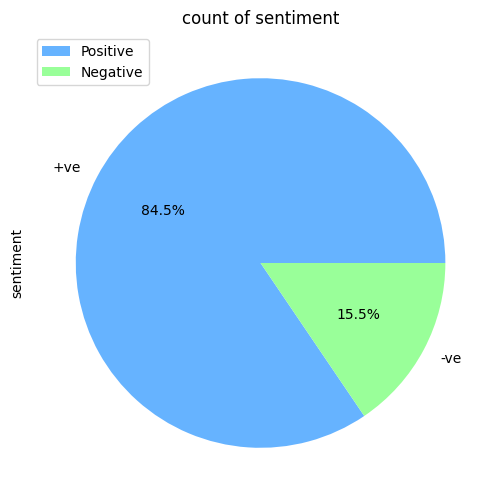

In [ ]:
colors = ['#66b3ff','#99ff99']
df['sentiment'].value_counts().plot.pie(figsize=(6,6) , title='count of sentiment' ,labels=['+ve','-ve'],autopct='%1.1f%%', colors=colors)
labels=["Positive","Negative"]
plt.legend(labels,loc=2)

#Bag Of Words

In [ ]:
cv=CountVectorizer()
x=cv.fit_transform(df['Review_Text'])

#Train Test Split

In [ ]:
X=x.toarray()
y=df['sentiment']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

#Smote

In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
x_train_sm,y_train_sm=sm.fit_resample(x_train,y_train)

#Naive Bayes

In [ ]:
clf=MultinomialNB()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

#Metrics

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy score is ',accuracy)

cr=classification_report(y_test,y_pred)
print(cr)

Accuracy score is  0.8618473895582329
              precision    recall  f1-score   support

           0       0.75      0.20      0.32       199
           1       0.87      0.99      0.92      1046

    accuracy                           0.86      1245
   macro avg       0.81      0.59      0.62      1245
weighted avg       0.85      0.86      0.83      1245



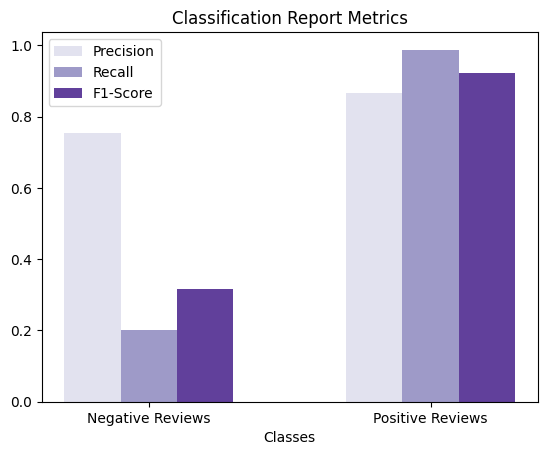

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Parse the classification report for precision, recall, and F1-score
class_names = ['Negative Reviews', 'Positive Reviews']

# Get the classification report
cr = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)

# Extract precision, recall, and f1-score for each class
precision = [cr[class_name]['precision'] for class_name in class_names]
recall = [cr[class_name]['recall'] for class_name in class_names]
f1_score = [cr[class_name]['f1-score'] for class_name in class_names]

# Define a colormap with shades of the same color
colors = plt.cm.Purples(np.linspace(0.2, 0.8, 3))

# Plot the scores
fig, ax = plt.subplots()
x = range(len(class_names))

ax.bar(x, precision, width=0.2, color=colors[0], label='Precision')
ax.bar([i + 0.2 for i in x], recall, width=0.2, color=colors[1], label='Recall')
ax.bar([i + 0.4 for i in x], f1_score, width=0.2, color=colors[2], label='F1-Score')

ax.set_xticks([i + 0.2 for i in x])
ax.set_xticklabels(class_names)
ax.set_xlabel('Classes')
ax.set_title('Classification Report Metrics')
ax.legend()

plt.show()




In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[  40  159]
 [  13 1033]]


In [ ]:
! pip install seaborn

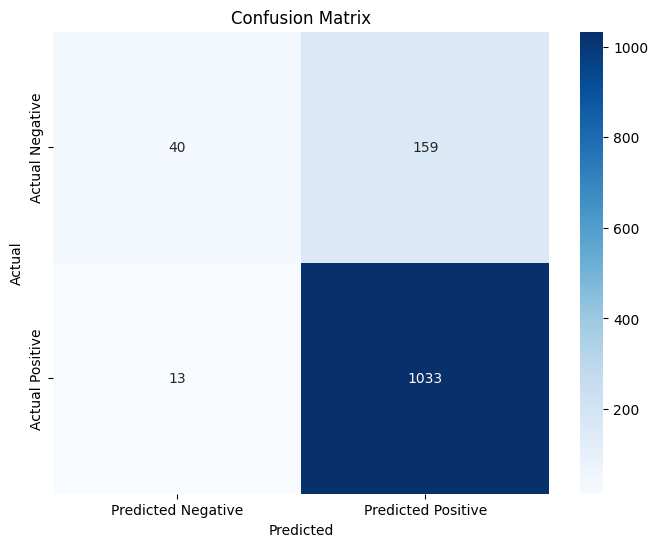

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

[[  40  159]
 [  13 1033]]


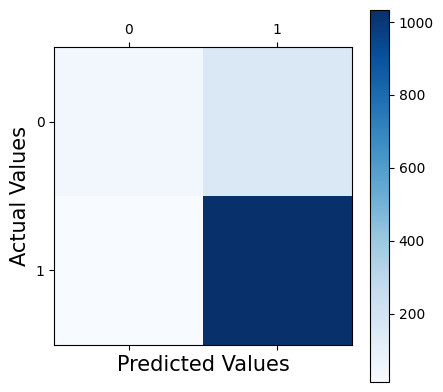

In [ ]:
plt.matshow(cm,cmap=plt.cm.Blues)
plt.colorbar()
plt.ylabel('Actual Values',fontsize=15)
plt.xlabel('Predicted Values',fontsize=15)
print(cm)

In [ ]:
import squarify
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import regex as re

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Ulta Skincare Reviews.csv')
df.head(3)

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower...,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm o...,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
2,Clean skin,Enjoy this product so much ! I look forward to...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


### Number of Products of each type

In [ ]:
df.Product.unique()

array(['Multi-Vitamin Thermafoliant', 'Hydro Masque Exfoliant',
       'Daily Superfoliant', 'Daily Microfoliant'], dtype=object)

In [ ]:
df.Brand.unique()
df.Scrape_Date.unique()

array(['3/27/23'], dtype=object)

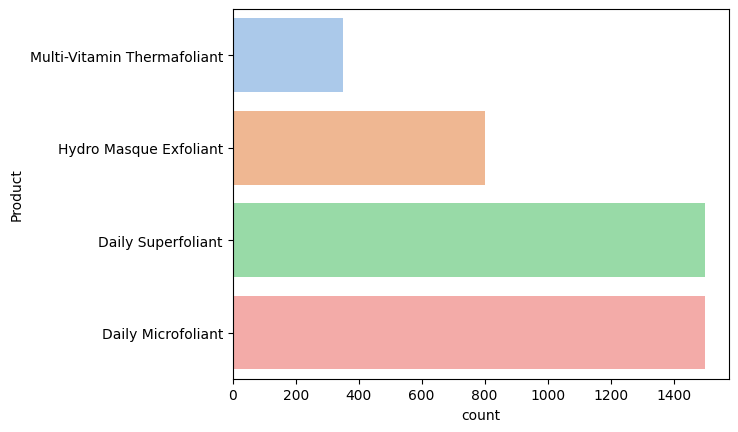

In [ ]:
sns.countplot(data = df, y= 'Product', orient = 'V', palette = 'pastel')
#plt.xticks(rotation =45)
plt.show()

### Upvotes and Downvotes on Product Reviews

Further analyses the accuracy of the reviews

<ipython-input-108-14285e65c4e7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Product').sum()['Review_Upvotes'].plot(kind = 'barh', color='#7AF8D8')


Text(0.5, 1.0, 'Review Upvotes Productwise')

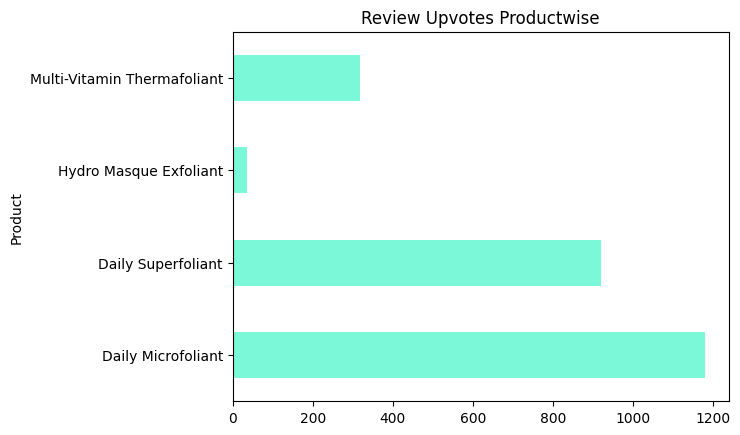

In [ ]:
df.groupby('Product').sum()['Review_Upvotes'].plot(kind = 'barh', color='#7AF8D8')
plt.title('Review Upvotes Productwise')

<ipython-input-109-b9f7186acd29>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Product').sum()['Review_Downvotes'].plot(kind = 'barh', color='#7AC1F8')


Text(0.5, 1.0, 'Review Downvotes Productwise')

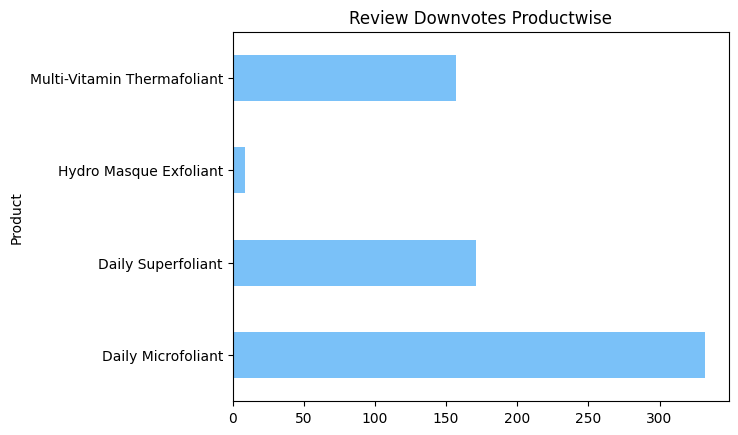

In [ ]:
df.groupby('Product').sum()['Review_Downvotes'].plot(kind = 'barh', color='#7AC1F8')
plt.title('Review Downvotes Productwise')

### Number of Verified vs Non-Verified Buyers

Further analyses the authenticity of the reviews made

<Axes: xlabel='Verified_Buyer', ylabel='count'>

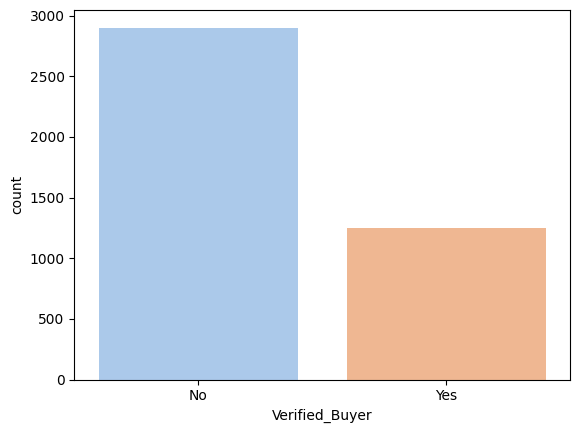

In [ ]:
sns.countplot(data = df, x = 'Verified_Buyer', palette = 'pastel')

### Developing a Recommendation Engine for Skincare Products

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

from bokeh.io import curdoc, push_notebook, output_notebook
from bokeh.layouts import column, layout
from bokeh.models import ColumnDataSource, Div, Select, Slider, TextInput, HoverTool
from bokeh.plotting import figure, show
from ipywidgets import interact, interactive, fixed, interact_manual

###  Loading data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/skincare_products_clean.csv')  #use your respective path here
data

,product_name,product_url,product_type,clean_ingreds,price
0,The Ordinary Natural Moisturising Factors + HA...,https://www.lookfantastic.com/the-ordinary-nat...,Moisturiser,"['capric triglyceride', 'cetyl alcohol', 'prop...",£5.20
1,CeraVe Facial Moisturising Lotion SPF 25 52ml,https://www.lookfantastic.com/cerave-facial-mo...,Moisturiser,"['homosalate', 'glycerin', 'octocrylene', 'eth...",£13.00
2,The Ordinary Hyaluronic Acid 2% + B5 Hydration...,https://www.lookfantastic.com/the-ordinary-hya...,Moisturiser,"['sodium hyaluronate', 'sodium hyaluronate', '...",£6.20
3,AMELIORATE Transforming Body Lotion 200ml,https://www.lookfantastic.com/ameliorate-trans...,Moisturiser,"['ammonium lactate', 'c12-15', 'glycerin', 'pr...",£22.50
4,CeraVe Moisturising Cream 454g,https://www.lookfantastic.com/cerave-moisturis...,Moisturiser,"['glycerin', 'cetearyl alcohol', 'capric trigl...",£16.00
...,...,...,...,...,...
1133,Elemis Life Elixirs Embrace Bath and Shower El...,https://www.lookfantastic.com/elemis-life-elix...,Bath Oil,"['prunus amygdalus dulcis', 'tipa-laureth sulf...",£55.00
1134,Love Boo Splendidly Soothing Bath Soak (250ml),https://www.lookfantastic.com/love-boo-splendi...,Bath Oil,"['sodium lauroyl', 'sodium cocoamphoacetate', ...",£10.99
1135,Elemis Life Elixirs Fortitude Bath and Shower ...,https://www.lookfantastic.com/elemis-life-elix...,Bath Oil,"['prunus amygdalus dulcis', 'tipa-laureth sulf...",£55.00
1136,Connock London Kukui Oil Soothing Bath & Showe...,https://www.lookfantastic.com/connock-london-k...,Bath Oil,"['capric triglyceride', 'peg-40 sorbitan perol...",£36.00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_name   1138 non-null   object
 1   product_url    1138 non-null   object
 2   product_type   1138 non-null   object
 3   clean_ingreds  1138 non-null   object
 4   price          1138 non-null   object
dtypes: object(5)
memory usage: 44.6+ KB


In [ ]:
for i in range(len(data['clean_ingreds'])):
    data['clean_ingreds'].iloc[i] = str(data['clean_ingreds'].iloc[i]).replace('[', '').replace(']', '').replace("'", '').replace('"', '')

In [ ]:
all_ingreds = []

for i in data['clean_ingreds']:
    ingreds_list = i.split(', ')
    for j in ingreds_list:
        all_ingreds.append(j)

In [ ]:
all_ingreds = sorted(set(all_ingreds))
all_ingreds[0:20]

['',
 '1,10-decanediol',
 '1,2-hexanediol',
 '1,2-hexanediol ',
 '1-methylhydantoin-2-imide',
 '10-hydroxydecanoic acid',
 '2,6-dimethyl-7-octen-2-ol',
 '2-bromo-2-nitropropane-1,3-diol',
 '2-oleamido-1',
 '3-o-ethyl ascorbic acid',
 '3-octadecanediol',
 '4-t-butylcyclohexanol',
 '7-dehydrocholesterol',
 'abies alba leaf oil',
 'abies balsamea extract',
 'abies sibirica oil',
 'acacia concinna fruit extract',
 'acacia decurrens wax',
 'acacia senegal gum',
 'acacia seyal gum extract']

In [ ]:
all_ingreds.remove('')
for i in range(len(all_ingreds)):
    if all_ingreds[i][-1] == ' ':
        all_ingreds[i] = all_ingreds[i][0:-1]

all_ingreds = sorted(set(all_ingreds))
all_ingreds[0:20]

['1,10-decanediol',
 '1,2-hexanediol',
 '1-methylhydantoin-2-imide',
 '10-hydroxydecanoic acid',
 '2,6-dimethyl-7-octen-2-ol',
 '2-bromo-2-nitropropane-1,3-diol',
 '2-oleamido-1',
 '3-o-ethyl ascorbic acid',
 '3-octadecanediol',
 '4-t-butylcyclohexanol',
 '7-dehydrocholesterol',
 'abies alba leaf oil',
 'abies balsamea extract',
 'abies sibirica oil',
 'acacia concinna fruit extract',
 'acacia decurrens wax',
 'acacia senegal gum',
 'acacia seyal gum extract',
 'acer saccharum extract',
 'acetate']

In [ ]:
['1,10-decanediol',
 '1,2-hexanediol',
 '1-methylhydantoin-2-imide',
 '10-hydroxydecanoic acid',
 '2,6-dimethyl-7-octen-2-ol',
 '2-bromo-2-nitropropane-1,3-diol',
 '2-oleamido-1',
 '3-o-ethyl ascorbic acid',
 '3-octadecanediol',
 '4-t-butylcyclohexanol',
 '7-dehydrocholesterol',
 'abies alba leaf oil',
 'abies balsamea extract',
 'abies sibirica oil',
 'acacia concinna fruit extract',
 'acacia decurrens wax',
 'acacia senegal gum',
 'acacia seyal gum extract',
 'acer saccharum extract',
 'acetate']
one_hot_list = [[0] * 0 for i in range(len(all_ingreds))]

for i in data['clean_ingreds']:
    k=0
    for j in all_ingreds:
        if j in i:
            one_hot_list[k].append(1)
        else:
            one_hot_list[k].append(0)
        k+=1

ingred_matrix = pd.DataFrame(one_hot_list).transpose()
ingred_matrix.columns = [sorted(set(all_ingreds))]

ingred_matrix

,"1,10-decanediol","1,2-hexanediol",1-methylhydantoin-2-imide,10-hydroxydecanoic acid,"2,6-dimethyl-7-octen-2-ol","2-bromo-2-nitropropane-1,3-diol",2-oleamido-1,3-o-ethyl ascorbic acid,3-octadecanediol,4-t-butylcyclohexanol,...,zinc glycine,zinc laurate,zinc oxide,zinc pca,zinc sulfate,zingiber aromaticus extract,zingiber cassumunar root oil,zingiber officinale root extract,zingiber officinale root oil,zizyphus jujuba seed extract
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
svd = TruncatedSVD(n_components=150, n_iter = 500, random_state = 6) # firstly reduce features to 150 with truncatedSVD - this suppresses some noise
svd_features = svd.fit_transform(ingred_matrix)
tsne = TSNE(n_components = 2, n_iter = 5000, random_state = 6) # reduce 150 features to 2 using t-SNE with exact method
tsne_features = tsne.fit_transform(svd_features)

data['X'] = tsne_features[:, 0]
data['Y'] = tsne_features[:, 1]

### Visualising similarities

In [ ]:
unique_types = ['Moisturiser', 'Serum', 'Oil', 'Mist', 'Balm', 'Mask', 'Peel',
       'Eye Care', 'Cleanser', 'Toner', 'Exfoliator', 'Bath Salts',
       'Body Wash', 'Bath Oil']

source = ColumnDataSource(data)

plot = figure(title = "Mapped Similarities", width = 800, height = 600)
plot.xaxis.axis_label = "t-SNE 1"
plot.yaxis.axis_label = 't-SNE 2'

plot.circle(x = 'X', y = 'Y', source = source, fill_alpha=0.7, size=10,
           color = '#c0a5e3', alpha = 1)

plot.background_fill_color = "#E9E9E9"
plot.background_fill_alpha = 0.3

hover = HoverTool(tooltips=[('Product', '@product_name'), ('Price', '@price')])
plot.add_tools(hover)

def type_updater(product_type = unique_types[0]):
    new_data = {'X' : data[data['product_type'] == product_type]['X'],
                'Y' : data[data['product_type'] == product_type]['Y'],
                'product_name' : data[data['product_type'] == product_type]['product_name'],
                'price' : data[data['product_type'] == product_type]['price']}
    source.data = new_data
    push_notebook()

output_notebook()
show(plot, notebook_handle = True)
interact(type_updater, product_type = unique_types)

interactive(children=(Dropdown(description='product_type', options=('Moisturiser', 'Serum', 'Oil', 'Mist', 'Ba…

<function __main__.type_updater(product_type='Moisturiser')>

###Extracting brand names

In [ ]:
brand_list = ["111skin", "a'kin", "acorelle", "adam revolution", "aesop", "ahava", "alchimie forever",
             "algenist", "alpha-h", "ambre solaire", "ameliorate", "american crew", "anthony", "antipodes",
             "apivita", "argentum", "ark skincare", "armani", "aromatherapy associates", "aromaworks", "aromatica",
             "aurelia probiotic skincare", "aurelia skincare",
             "australian bodycare", "avant skincare", "aveda", "aveeno", "avene", "avène",
             "bakel", "balance me", "barber pro", "bareminerals", "barry m cosmetics",
             "baxter of california", "bbb london", "beautypro", "benefit", "benton", "bioderma",
             "bioeffect", "bloom & blossom", "bloom and blossom", "bobbi brown", "bondi sands", "bubble t", "bulldog", "burt's bees",
             "by terry", "carita", "caudalie", "cerave", "chantecaille", "clinique",
             "comfort zone", "connock london", "cosmetics 27", "cosrx", "cowshed", "crystal clear",
             "cult51", "darphin", "dear, klairs", "decleor", "decléor", "dermalogica", "dhc", "doctors formula",
             "dr. brandt", "dr brandt", "dr. hauschka", "dr hauschka", "dr. jackson's", "dr.jart+", "dr. lipp",
             "dr botanicals", "dr dennis", "dr. pawpaw", "ecooking", "egyptian magic",
             "eisenberg", "elemental herbology", "elemis", "elizabeth arden", "embryolisse",
             "emma hardie", "erno laszlo", "espa", "estée lauder", "estee lauder", "eucerin",
             "eve lom", "eve rebirth", "fade out", "farmacy", "filorga", "first aid beauty", "fit", "foreo",
             "frank body", "freezeframe", "gallinée", "garnier", "gatineau", "glamglow", "goldfaden md",
             "green people", "hawkins and brimble", "holika holika", "house 99", "huxley",
             "ilapothecary", "ila-spa", "indeed labs", "inika", "instant effects", "institut esthederm", "ioma", "klorane",
             "j.one", "jack black", "james read", "jason", "jo malone london", "juice beauty", "jurlique",
             "korres", "l:a bruket", "l'oréal men expert", "l'oreal men expert", "l'oréal paris", "l'oreal paris",
             "l’oréal paris", "lab series skincare for men",
             "lancaster", "lancer skincare", "lancôme", "lancome", "lanolips", "la roche-posay", "laura mercier",
             "liftlab", "little butterfly london", "lixirskin", "liz earle", "love boo",
             "löwengrip", "lowengrip", "lumene", "mac", "madara", "mádara", "magicstripes", "magnitone london",
             "mama mio", "mancave", "manuka doctor", "mauli", "mavala", "maybelline", "medik8", "men-u", "menaji", "molton brown", "moroccanoil",
             "monu", "murad", "naobay", "nars", "natio", "natura bissé", "natura bisse",
             "neal's yard remedies", "neom", "neostrata", "neutrogena", "niod", "nip+fab", "nuxe", "nyx",
             "oh k!", "omorovicza", "origins", "ortigia fico", "oskia", "ouai", "pai ", "paula's choice", "payot",
             "perricone md", "pestle & mortar", "pestle and mortar", "peter thomas roth",
             "philosophy", "pierre fabre", "pixi", "piz buin", "polaar", "prai", "project lip",
             "radical skincare", "rapideye", "rapidlash", "real chemistry", "recipe for men",
             "ren ", "renu", "revolution beauty", "revolution skincare", "rituals", "rmk", "rodial", "roger&gallet", "salcura",
             "sanctuary spa", "sanoflore", "sarah chapman", "sea magik", "sepai",
             "shaveworks", "shea moisture", "shiseido", "skin79", "skin authority", "skinceuticals",
             "skinchemists", "skindoctors", "skin doctors", "skinny tan", "sol de janeiro", "spa magik organiks",
              "st. tropez", "starskin", "strivectin", "sukin",
             "svr", "swiss clinic", "talika", "tan-luxe", "tanorganic", "tanworx", "thalgo", "the chemistry brand",
             "the hero project", "the inkey list", "the jojoba company", "the ordinary",
             "the organic pharmacy", "the ritual of namasté", "this works", "too faced", "trilogy", "triumph and disaster",
             "ultrasun", "uppercut deluxe", "urban decay", "uriage", "verso", "vichy",
             "vida glow", "vita liberata", "wahl", "weleda", "westlab", "wilma schumann", "yes to",
             "ysl", "zelens"]
brand_list = sorted(brand_list, key=len, reverse=True)

###  Creating the recommendation function


In [ ]:
data['brand'] = data['product_name'].str.lower()
k=0
for i in data['brand']:
    for j in brand_list:
        if j in i:
            data['brand'][k] = data['brand'][k].replace(i, j.title())
    k+=1

data

<ipython-input-122-08b945dafb2e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['brand'][k] = data['brand'][k].replace(i, j.title())


,product_name,product_url,product_type,clean_ingreds,price,X,Y,brand
0,The Ordinary Natural Moisturising Factors + HA...,https://www.lookfantastic.com/the-ordinary-nat...,Moisturiser,"capric triglyceride, cetyl alcohol, propanedio...",£5.20,-9.880556,-43.689865,The Ordinary
1,CeraVe Facial Moisturising Lotion SPF 25 52ml,https://www.lookfantastic.com/cerave-facial-mo...,Moisturiser,"homosalate, glycerin, octocrylene, ethylhexyl,...",£13.00,-57.701603,-41.302715,Cerave
2,The Ordinary Hyaluronic Acid 2% + B5 Hydration...,https://www.lookfantastic.com/the-ordinary-hya...,Moisturiser,"sodium hyaluronate, sodium hyaluronate, panthe...",£6.20,-13.795649,-36.580887,The Ordinary
3,AMELIORATE Transforming Body Lotion 200ml,https://www.lookfantastic.com/ameliorate-trans...,Moisturiser,"ammonium lactate, c12-15, glycerin, prunus amy...",£22.50,39.886356,34.729107,Ameliorate
4,CeraVe Moisturising Cream 454g,https://www.lookfantastic.com/cerave-moisturis...,Moisturiser,"glycerin, cetearyl alcohol, capric triglycerid...",£16.00,-62.236130,-46.643162,Cerave
...,...,...,...,...,...,...,...,...
1133,Elemis Life Elixirs Embrace Bath and Shower El...,https://www.lookfantastic.com/elemis-life-elix...,Bath Oil,"prunus amygdalus dulcis, tipa-laureth sulfate,...",£55.00,63.323746,-4.802038,Elemis
1134,Love Boo Splendidly Soothing Bath Soak (250ml),https://www.lookfantastic.com/love-boo-splendi...,Bath Oil,"sodium lauroyl, sodium cocoamphoacetate, cocam...",£10.99,19.894642,37.189999,Love Boo
1135,Elemis Life Elixirs Fortitude Bath and Shower ...,https://www.lookfantastic.com/elemis-life-elix...,Bath Oil,"prunus amygdalus dulcis, tipa-laureth sulfate,...",£55.00,63.518562,-5.364894,Elemis
1136,Connock London Kukui Oil Soothing Bath & Showe...,https://www.lookfantastic.com/connock-london-k...,Bath Oil,"capric triglyceride, peg-40 sorbitan peroleate...",£36.00,27.517496,1.238325,Connock London


In [ ]:
sorted(data.brand.unique())

["A'Kin",
 'Acorelle',
 'Aesop',
 'Ahava',
 'Alchimie Forever',
 'Alpha-H',
 'Ambre Solaire',
 'Ameliorate',
 'Antipodes',
 'Apivita',
 'Ark Skincare',
 'Armani',
 'Aromatherapy Associates',
 'Aromaworks',
 'Aurelia Probiotic Skincare',
 'Aurelia Skincare',
 'Australian Bodycare',
 'Avant Skincare',
 'Aveda',
 'Aveeno',
 'Avene',
 'Avène',
 'Balance Me',
 'Barber Pro',
 'Bareminerals',
 'Bbb London',
 'Beautypro',
 'Benefit',
 'Benton',
 'Bioderma',
 'Bloom & Blossom',
 'Bloom And Blossom',
 'Bobbi Brown',
 'Bondi Sands',
 'Bubble T',
 'Bulldog',
 "Burt'S Bees",
 'By Terry',
 'Caudalie',
 'Cerave',
 'Chantecaille',
 'Clinique',
 'Comfort Zone',
 'Connock London',
 'Cosrx',
 'Cowshed',
 'Crystal Clear',
 'Darphin',
 'Dear, Klairs',
 'Decléor',
 'Dermalogica',
 'Dhc',
 'Dr Brandt',
 'Dr Dennis',
 'Dr Hauschka',
 'Dr. Brandt',
 'Dr. Hauschka',
 'Dr. Pawpaw',
 'Dr.Jart+',
 'Egyptian Magic',
 'Elemental Herbology',
 'Elemis',
 'Elizabeth Arden',
 'Embryolisse',
 'Emma Hardie',
 'Erno Laszlo

In [ ]:
data['brand'] = data['brand'].replace(['Aurelia Probiotic Skincare'],'Aurelia Skincare')
data['brand'] = data['brand'].replace(['Avene'],'Avène')
data['brand'] = data['brand'].replace(['Bloom And Blossom'],'Bloom & Blossom')
data['brand'] = data['brand'].replace(['Dr Brandt'],'Dr. Brandt')
data['brand'] = data['brand'].replace(['Dr Hauschka'],'Dr. Hauschka')
data['brand'] = data['brand'].replace(["L'oreal Paris", 'L’oréal Paris'], "L'oréal Paris")

### Using function to get recommendations

In [ ]:
def recommender(search):
    cs_list = []
    brands = []
    output = []
    binary_list = []
    idx = data[data['product_name'] == search].index.item()
    for i in ingred_matrix.iloc[idx][1:]:
        binary_list.append(i)
    point1 = np.array(binary_list).reshape(1, -1)
    point1 = [val for sublist in point1 for val in sublist]
    prod_type = data['product_type'][data['product_name'] == search].iat[0]
    brand_search = data['brand'][data['product_name'] == search].iat[0]
    data_by_type = data[data['product_type'] == prod_type]

    for j in range(data_by_type.index[0], data_by_type.index[0] + len(data_by_type)):
        binary_list2 = []
        for k in ingred_matrix.iloc[j][1:]:
            binary_list2.append(k)
        point2 = np.array(binary_list2).reshape(1, -1)
        point2 = [val for sublist in point2 for val in sublist]
        dot_product = np.dot(point1, point2)
        norm_1 = np.linalg.norm(point1)
        norm_2 = np.linalg.norm(point2)
        cos_sim = dot_product / (norm_1 * norm_2)
        cs_list.append(cos_sim)
    data_by_type = pd.DataFrame(data_by_type)
    data_by_type['cos_sim'] = cs_list
    data_by_type = data_by_type.sort_values('cos_sim', ascending=False)
    data_by_type = data_by_type[data_by_type.product_name != search]
    l = 0
    for m in range(len(data_by_type)):
        brand = data_by_type['brand'].iloc[l]
        if len(brands) == 0:
            if brand != brand_search:
                brands.append(brand)
                output.append(data_by_type.iloc[l])
        elif brands.count(brand) < 2:
            if brand != brand_search:
                brands.append(brand)
                output.append(data_by_type.iloc[l])
        l += 1

    return print('\033[1m', 'Recommending products similar to', search,':', '\033[0m'), print(pd.DataFrame(output)[['product_name', 'cos_sim']].head(5))

In [ ]:
recommender("Origins GinZing™ Energy-Boosting Tinted Moisturiser SPF40 50ml")

 Recommending products similar to Origins GinZing™ Energy-Boosting Tinted Moisturiser SPF40 50ml : 
                                         product_name   cos_sim
87  Clinique Moisture Surge SPF25 Sheertint Hydrat...  0.565322
44              Skin Doctors Sd White & Bright (50ml)  0.382546
54  Clinique Moisture Surge 72-Hour Auto-Replenish...  0.372046
34        Elemis Pro-Collagen Marine Cream SPF30 50ml  0.365339
42  Estée Lauder DayWear Multi-Protection Anti-Oxi...  0.362033


(None, None)

In [ ]:
recommender('Avène Antirougeurs Jour Redness Relief Moisturizing Protecting Cream (40ml)')

 Recommending products similar to Avène Antirougeurs Jour Redness Relief Moisturizing Protecting Cream (40ml) : 
                                          product_name   cos_sim
40           La Roche-Posay Nutritic Intense Rich 50ml  0.408956
87   Clinique Moisture Surge SPF25 Sheertint Hydrat...  0.408248
12         First Aid Beauty Ultra Repair Cream (56.7g)  0.379663
15          First Aid Beauty Ultra Repair Cream (170g)  0.379663
100  Alpha-H Daily Essential Moisturiser Spf50+ (50ml)  0.369800


(None, None)

In [ ]:
import squarify
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import regex as re

In [ ]:
Skincare = pd.read_csv('/content/drive/MyDrive/EDA/skincare_products_clean.csv')

In [ ]:
Skincare.head()

,product_name,product_url,product_type,clean_ingreds,price
0,The Ordinary Natural Moisturising Factors + HA...,https://www.lookfantastic.com/the-ordinary-nat...,Moisturiser,"['capric triglyceride', 'cetyl alcohol', 'prop...",£5.20
1,CeraVe Facial Moisturising Lotion SPF 25 52ml,https://www.lookfantastic.com/cerave-facial-mo...,Moisturiser,"['homosalate', 'glycerin', 'octocrylene', 'eth...",£13.00
2,The Ordinary Hyaluronic Acid 2% + B5 Hydration...,https://www.lookfantastic.com/the-ordinary-hya...,Moisturiser,"['sodium hyaluronate', 'sodium hyaluronate', '...",£6.20
3,AMELIORATE Transforming Body Lotion 200ml,https://www.lookfantastic.com/ameliorate-trans...,Moisturiser,"['ammonium lactate', 'c12-15', 'glycerin', 'pr...",£22.50
4,CeraVe Moisturising Cream 454g,https://www.lookfantastic.com/cerave-moisturis...,Moisturiser,"['glycerin', 'cetearyl alcohol', 'capric trigl...",£16.00


### Heat Map


<Axes: >

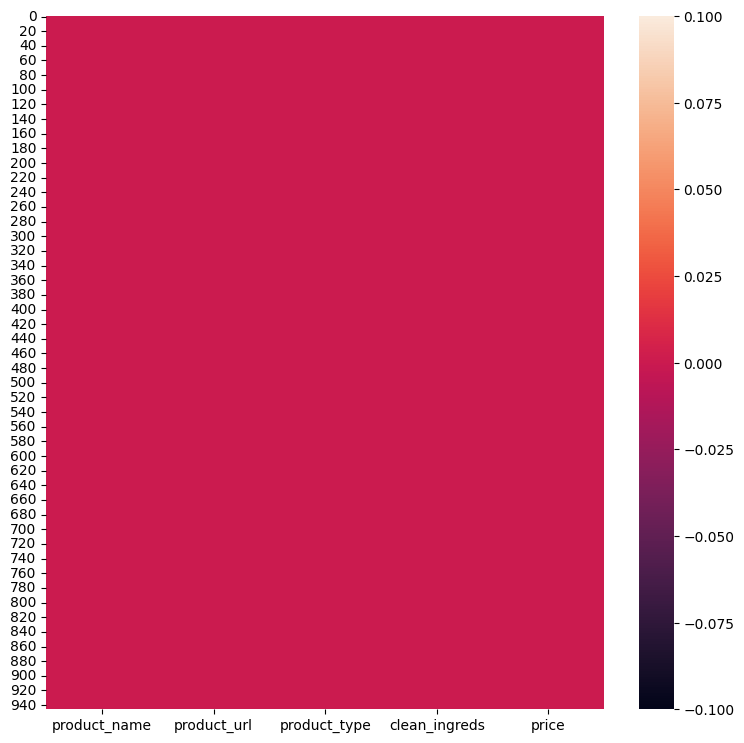

In [ ]:
Skincare.drop(Skincare[Skincare['product_type'] == 'Bath Salts' ].index, inplace = True)
Skincare.drop(Skincare[Skincare['product_type'] == 'Bath Oil' ].index, inplace = True)
Skincare.drop(Skincare[Skincare['product_type'] == 'Body Wash' ].index, inplace = True)

Skincare['price'] = Skincare['price'].str[1:].astype(float)  #Converting price to float


plt.figure(figsize=(9,9))
sns.heatmap(Skincare.isnull(), cbar='darkred')

In [ ]:
print(Skincare.shape)
Prod_Type=pd.DataFrame(Skincare['product_type'].value_counts(dropna=False))
print(Prod_Type)
PricexProd=Skincare.groupby('product_type')['price'].mean().sort_values(ascending=False)
print(PricexProd)

(946, 5)
             product_type
Mask                  124
Moisturiser           115
Cleanser              115
Serum                 113
Eye Care              100
Mist                   80
Oil                    76
Toner                  73
Balm                   61
Exfoliator             57
Peel                   32
product_type
Peel           49.518125
Serum          46.174159
Eye Care       30.674000
Oil            26.114605
Moisturiser    23.866696
Mist           22.944125
Toner          21.218630
Balm           20.931639
Exfoliator     18.858772
Cleanser       17.612435
Mask           15.114194
Name: price, dtype: float64


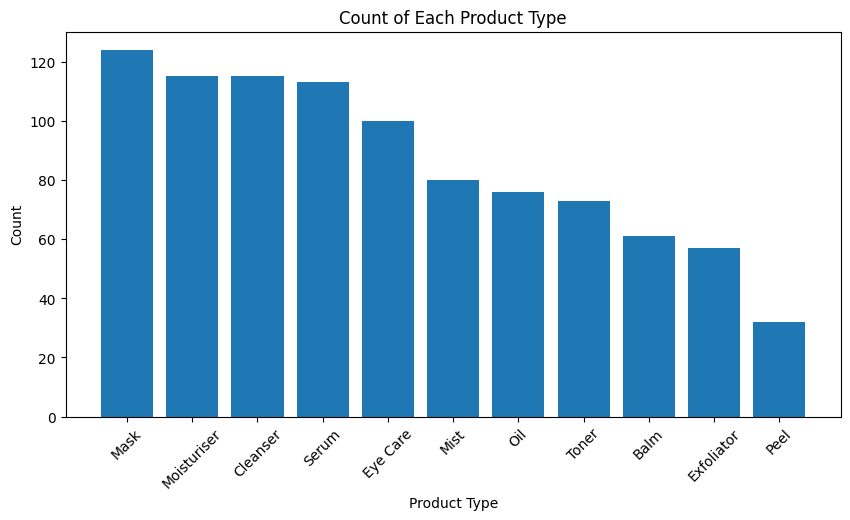

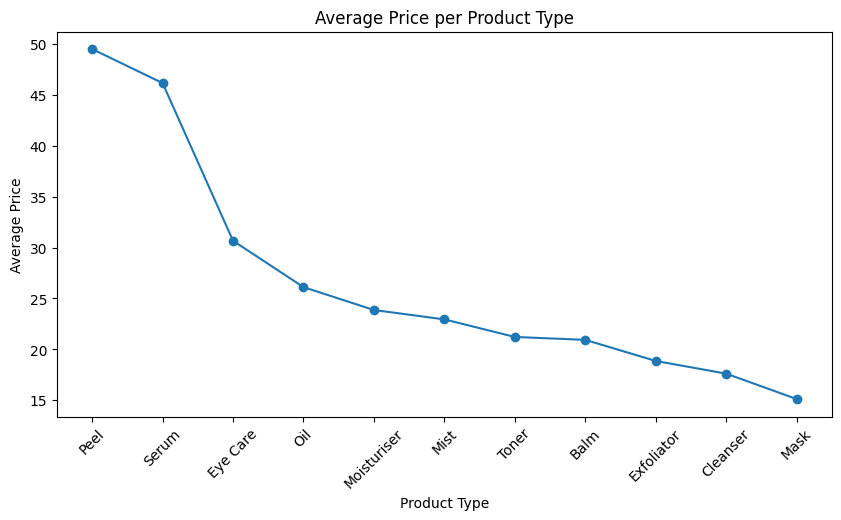

In [ ]:
import matplotlib.pyplot as plt

# Assuming Skincare is your DataFrame

# Plotting the count of each product type
plt.figure(figsize=(10, 5))
plt.bar(Prod_Type.index, Prod_Type['product_type'])
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.title('Count of Each Product Type')
plt.xticks(rotation=45)
plt.show()

# Plotting the average price per product type
plt.figure(figsize=(10, 5))
plt.plot(PricexProd.index, PricexProd.values, marker='o')
plt.xlabel('Product Type')
plt.ylabel('Average Price')
plt.title('Average Price per Product Type')
plt.xticks(rotation=45)
plt.show()


### Average Price of each kind of Product

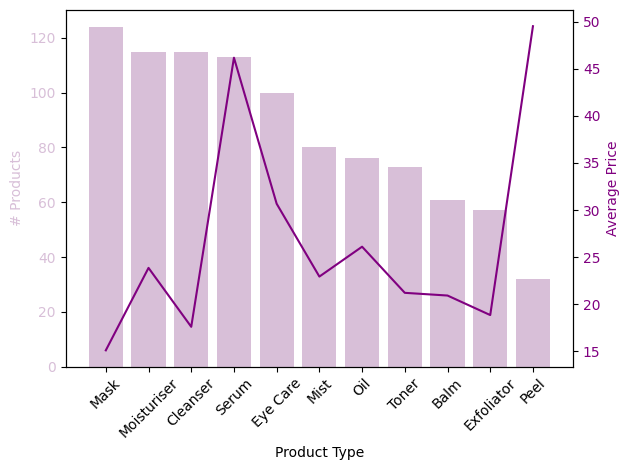

In [ ]:
Prod_Type_Info=Prod_Type.join(PricexProd)

labels = Prod_Type_Info.index.values.tolist()

fig, ax1 = plt.subplots()

color = 'thistle'
#color = ['thistle' if i != 'Serum' else 'purple' for i in labels]
ax1.set_xlabel('Product Type')
ax1.set_ylabel('# Products', color=color)
ax1.bar(labels, Prod_Type_Info['product_type'].tolist(), color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'purple'
ax2.set_ylabel('Average Price', color=color)  # we already handled the x-label with ax1
ax2.plot(labels, Prod_Type_Info['price'].tolist(), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
def Convert(string):
    li = list(string.split("', '"))
    return li

Ingredients=[]
for i in range(len(Skincare)):
    f=Convert(Skincare['clean_ingreds'].iloc[i][2:len(Skincare['clean_ingreds'].iloc[i])-2])
    Ingredients=Ingredients+f

#Contando cuando ingredientes hay
Ingredients=pd.DataFrame(Ingredients)
Ingre_Frec=pd.DataFrame(Ingredients[0].value_counts(dropna=False))
print(Ingre_Frec)

                                                      0
glycerin                                            683
phenoxyethanol                                      548
parfum                                              432
disodium edta                                       339
butylene glycol                                     315
...                                                 ...
vaccinium corymbosum (blueberry) seed oil             1
fragaria ananassa (strawberry) seed oil               1
cardiospermum halicacabum flower/leaf/vine extract    1
ethyl oleate                                          1
polyquaternium-37                                     1

[2458 rows x 1 columns]


### Most Frequently used Ingredients

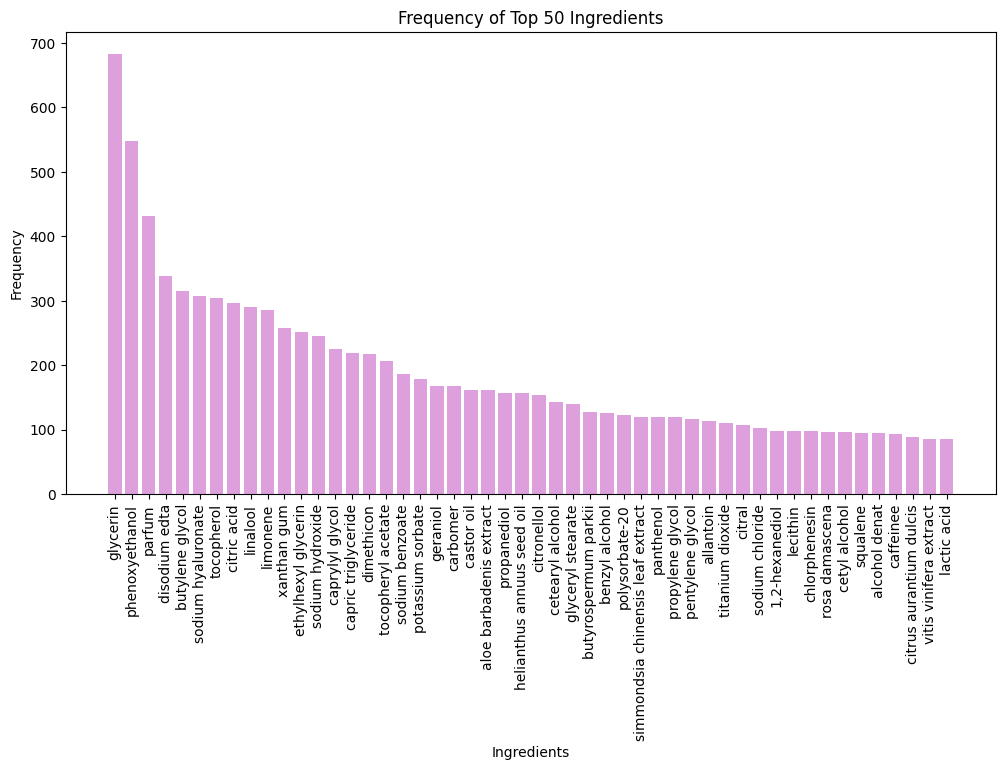

In [ ]:
def Convert(string):
    li = list(string.split("', '"))
    return li

Ingredients=[]
for i in range(len(Skincare)):
    f=Convert(Skincare['clean_ingreds'].iloc[i][2:len(Skincare['clean_ingreds'].iloc[i])-2])
    Ingredients=Ingredients+f

Ingredients=pd.DataFrame(Ingredients)
Ingre_Frec=pd.DataFrame(Ingredients[0].value_counts(dropna=False))

top_50_ingredients = Ingre_Frec.head(50)

plt.figure(figsize=(12, 6))
plt.bar(top_50_ingredients.index, top_50_ingredients[0], color='plum')
plt.xlabel('Ingredients')
plt.ylabel('Frequency')
plt.title('Frequency of Top 50 Ingredients')
plt.xticks(rotation=90)
plt.show()

In [ ]:
Main_Ing=['glycerin','sodium hyaluronate','dimethicon','lactic acid','caffeinee','squalene',
          'salicylic acid','niacinamide','benzoic acid','ascorbic acid','glycolic acid','hydrolyzed sodium hyaluronate','retinol']

#From the initial table, looking for the products that have those ingredients
for i in Main_Ing:
    #Skincare[i]=np.where((Skincare['clean_ingreds'].str.contains(i)))
    conditions=[Skincare['clean_ingreds'].str.contains(i),(~Skincare['clean_ingreds'].str.contains(i))]
    choices=[1,0]
    #choices=[Main_Ing[:2],""]
    Skincare[i]=np.select(conditions,choices)

print(Skincare.head())

                                        product_name  \
0  The Ordinary Natural Moisturising Factors + HA...   
1      CeraVe Facial Moisturising Lotion SPF 25 52ml   
2  The Ordinary Hyaluronic Acid 2% + B5 Hydration...   
3          AMELIORATE Transforming Body Lotion 200ml   
4                     CeraVe Moisturising Cream 454g   

                                         product_url product_type  \
0  https://www.lookfantastic.com/the-ordinary-nat...  Moisturiser   
1  https://www.lookfantastic.com/cerave-facial-mo...  Moisturiser   
2  https://www.lookfantastic.com/the-ordinary-hya...  Moisturiser   
3  https://www.lookfantastic.com/ameliorate-trans...  Moisturiser   
4  https://www.lookfantastic.com/cerave-moisturis...  Moisturiser   

                                       clean_ingreds  price  glycerin  \
0  ['capric triglyceride', 'cetyl alcohol', 'prop...    5.2         1   
1  ['homosalate', 'glycerin', 'octocrylene', 'eth...   13.0         1   
2  ['sodium hyaluronate', 'so

### Relation between Price and Number of Ingredients used


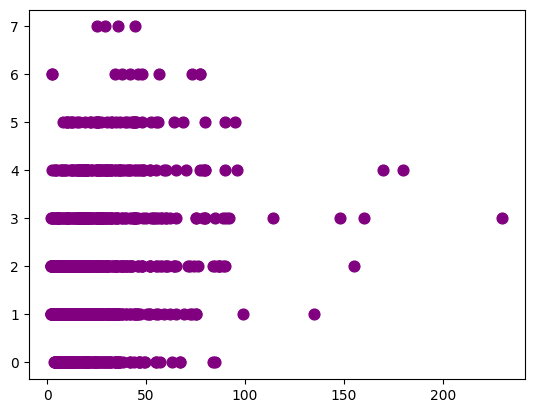

In [ ]:
Skincare['No_Ingr']=Skincare[Main_Ing].sum(axis=1)

plt.scatter(Skincare.price, Skincare.No_Ingr, s=60, c='purple')

### Relation between Price and Number of Ingredients used

No_Ingr
1    21.327027
0    21.381458
2    22.559729
3    32.887956
7    33.637500
4    34.780220
5    35.939048
6    45.201818
Name: price, dtype: float64


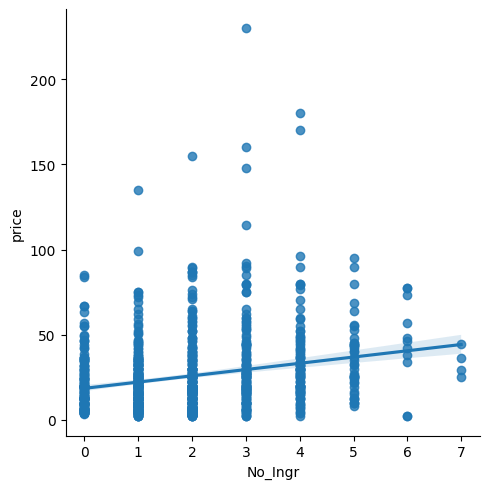

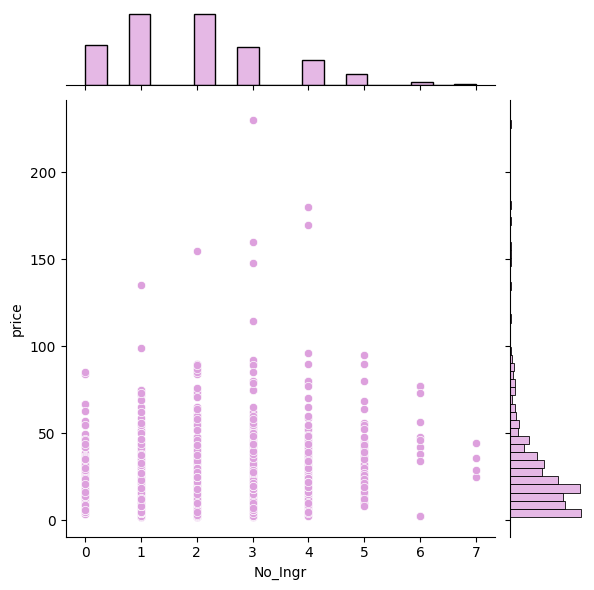

In [ ]:
sns.lmplot(x="No_Ingr",y="price",data=Skincare)
sns.jointplot(x="No_Ingr", y="price", data=Skincare,color='plum')
PricexIngr=Skincare.groupby('No_Ingr')['price'].mean().sort_values(ascending=True)
print(PricexIngr)

### Relation between Price and certain Ingredient Combinations

In [ ]:
Skc=Skincare.copy()
for i in Main_Ing:
    #Skincare[i]=np.where((Skincare['clean_ingreds'].str.Skc(i)))
    conditions=[Skc['clean_ingreds'].str.contains(i),(~Skincare['clean_ingreds'].str.contains(i))]
    #choices=[1,0]
    choices=[i[:2],""]
    Skc[i]=np.select(conditions,choices)


Skc['Ing'] = Skc[['glycerin','sodium hyaluronate','dimethicon','lactic acid','caffeinee','squalene','salicylic acid','niacinamide','benzoic acid','ascorbic acid','glycolic acid','hydrolyzed sodium hyaluronate','retinol']].agg(' '.join, axis=1)
Frec_Com_Ing_=pd.DataFrame(Skc['Ing'].value_counts(dropna=False))
PricexTIngr=Skc.groupby('Ing')['price'].mean().sort_values(ascending=False)
Ing_Comb_Info=Frec_Com_Ing_.join(PricexTIngr)
Ing_Comb_Info=Ing_Comb_Info.sort_values(by=['price'],ascending=False)
print(Ing_Comb_Info.sort_values(by=['price'],ascending=False))

                          Ing   price
gl so di      be            1  170.00
gl   la       gl            3   95.00
gl   la     be              1   92.00
gl so        as             3   91.00
gl so  la ca sq             1   90.00
...                       ...     ...
gl so         gl            1    7.00
gl so        as gl          1    7.00
      sa  be                1    3.99
       ni                   1    3.50
gl so di la  sq  ni         2    2.36

[144 rows x 2 columns]


<ipython-input-17-ee0cfeb95243>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Skc['Contenido'][i]=without_empty_strings
/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


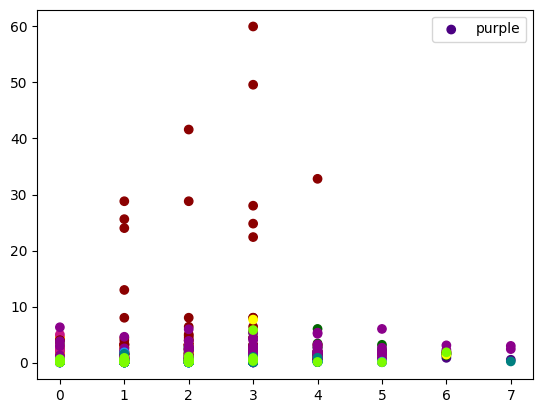

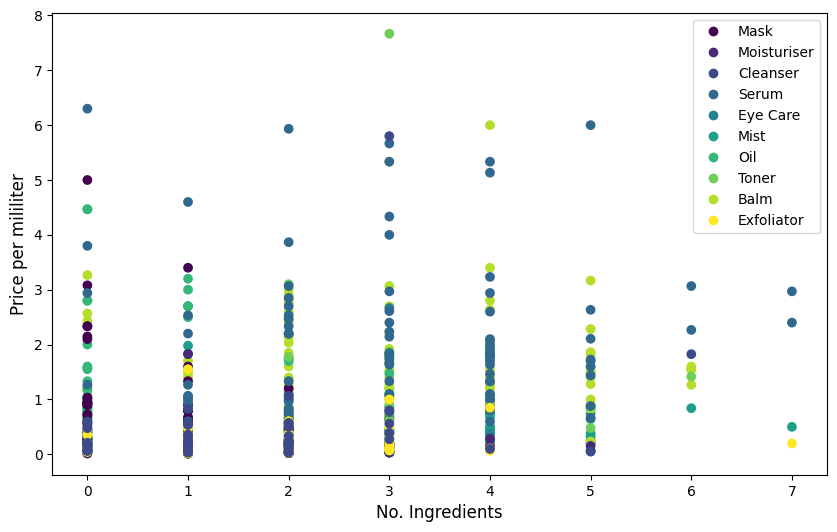

In [ ]:
Skc=Skc.assign(Contenido='')

for i in range(len(Skc)):
#i=0
    if Skc['product_name'][i].rfind('ml')<0 and Skc['product_name'][i].rfind('g')<0:
        ret=0
    elif Skc['product_name'][i].rfind('ml')<0:
        ret=Skc['product_name'][i].rfind('g')
    else:
        ret=Skc['product_name'][i].rfind('ml')

    if ret==0:

        if Skc['product_type'][i]=='Moisturiser':
            without_empty_strings=50 #Average sizes of these type of products
        elif Skc['product_type'][i]=='Mask':
            without_empty_strings=1.25
        elif Skc['product_type'][i]=='Serum':
            without_empty_strings=30
        elif Skc['product_type'][i]=='Eye Care':
            without_empty_strings=15
        elif Skc['product_type'][i]=='Cleanser':
            without_empty_strings=200
        else:
            without_empty_strings=40
    else:
        pr=Skc['product_name'][i][ret-4:ret]
        loi=re.findall("\d+\.*\d+", pr)
        try:
            without_empty_strings = float([string for string in loi if string != ""][0])
        except:
            if Skc['product_type'][i]=='Moisturiser':
                without_empty_strings=50
            elif Skc['product_type'][i]=='Mask':
                without_empty_strings=1.25
            elif Skc['product_type'][i]=='Serum':
                without_empty_strings=30
            elif Skc['product_type'][i]=='Eye Care':
                without_empty_strings=15
            else:
                without_empty_strings=40

    Skc['Contenido'][i]=without_empty_strings

Skc['Price_ml']=Skc['price']/Skc['Contenido']

fig, ax = plt.subplots()

colors = {'Mask':'darkred', 'Moisturiser':'indigo', 'Cleanser':'dodgerblue',
          'Serum':'darkgreen', 'Eye Care':'darkmagenta', 'Mist':'crimson', 'Oil':'darkorange',
          'Toner':'teal', 'Balm':'mediumvioletred', 'Exfoliator':'lawngreen', 'Peel':'yellow'}


scatter=plt.scatter(Skc['No_Ingr'], Skc['Price_ml'], c=Skc['product_type'].map(colors),label=color)
labels = Prod_Type_Info.index.values.tolist()
plt.legend(handles=scatter.legend_elements()[0], labels=labels)
plt.show()

#I am having an outlier for masks
Skc.drop(Skincare[Skincare['product_type'] == 'Mask' ].index, inplace = True)



plt.figure(figsize=(10,6))
scatter=plt.scatter(Skc['No_Ingr'], Skc['Price_ml'], c=Skc['product_type'].astype('category').map(colors).cat.codes)
labels = Prod_Type_Info.index.values.tolist()
plt.legend(handles=scatter.legend_elements()[0], labels=labels)
plt.xlabel("No. Ingredients", size=12)
plt.ylabel("Price per mililiter", size=12)
plt.show()

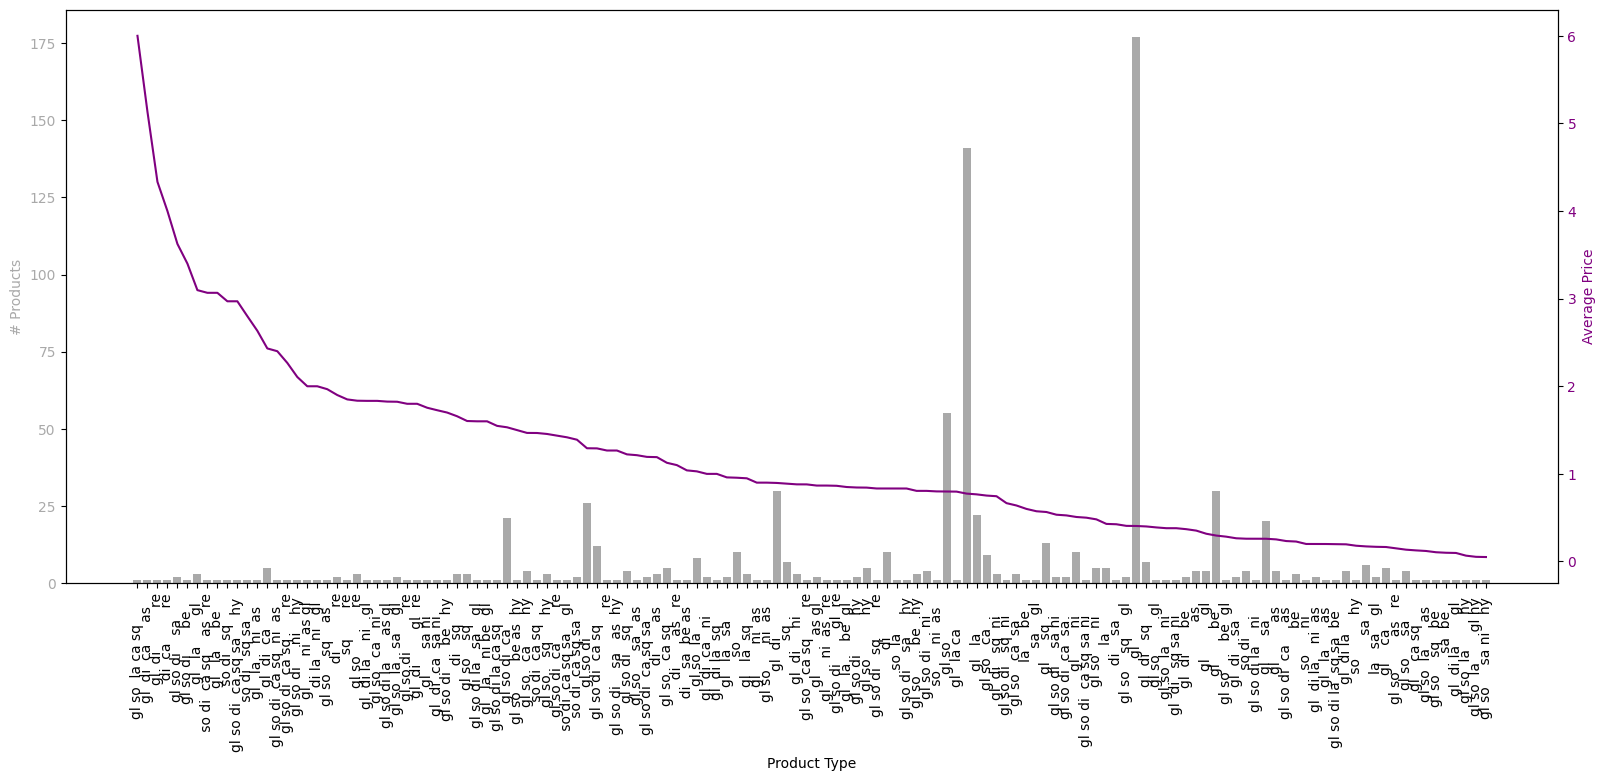

In [ ]:
Skc['Ing'] = Skc[['glycerin','sodium hyaluronate','dimethicon','lactic acid','caffeinee','squalene','salicylic acid','niacinamide','benzoic acid','ascorbic acid','glycolic acid','hydrolyzed sodium hyaluronate','retinol']].agg(' '.join, axis=1)
Frec_Com_Ing_=pd.DataFrame(Skc['Ing'].value_counts(dropna=False))
PricexTIngr=Skc.groupby('Ing')['Price_ml'].mean().sort_values(ascending=False)
Ing_Comb_Info=Frec_Com_Ing_.join(PricexTIngr)
Ing_Comb_Info=Ing_Comb_Info.sort_values(by=['Price_ml'],ascending=False)

labels = Ing_Comb_Info.index.values.tolist()

fig, ax1 = plt.subplots()

color = 'darkgrey'
#color = ['dimgray' if i != 'Serum' else 'red' for i in labels]
ax1.set_xlabel('Product Type')
ax1.set_ylabel('# Products', color=color)
ax1.bar(labels, Ing_Comb_Info['Ing'].tolist(), color=color)
#ax1.bar_label(Prod_Type_Info['product_type'].tolist(), label_type='center')
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=90)

ax2 = ax1.twinx()
# instantiate a second axes that shares the same x-axis

color = 'purple'
ax2.set_ylabel('Average Price', color=color)  # we already handled the x-label with ax1
ax2.plot(labels, Ing_Comb_Info['Price_ml'].tolist(), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.set_size_inches(18.5, 10.5)
plt.show()


From the above analysis, it appears the price is higher when the product contains caffeine and retinol on its formula.